In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 219s 19us/step


In [3]:
type(X_train)

numpy.ndarray

3


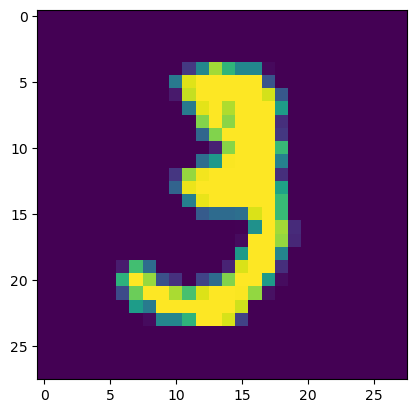

In [8]:
num = 10

plt.imshow(X_train[num])
print(y_train[num])

## Model

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 64, activation="relu"),
    keras.layers.Dense(units = 10, activation="softmax")
])

model.compile(optimizer=tf.optimizers.Adam(),
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [13]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4909 - accuracy: 0.8769
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3332 - accuracy: 0.9130
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2797 - accuracy: 0.9261
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2561 - accuracy: 0.9312
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2403 - accuracy: 0.9358


### Observation 1


- First run: I forgot to set epoch value, therefore, the epoch was as default i.e, 1. __loss__ = 2.1320, __accuracy__ = 0.7610
- Second run: __epochs__ = _5_. __loss__ = _0.2403_, __accuracy__ = _0.9358_

# Normalizing data

In [22]:
X_train_norm = X_train/255
X_test_norm = X_test/255

In [15]:
model_norm = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(units = 64, activation="relu"),
    keras.layers.Dense(units = 10, activation="softmax")
])

model_norm.compile(optimizer=tf.optimizers.Adam(),
             loss = "sparse_categorical_crossentropy",
             metrics=['accuracy'])

In [25]:
model_norm.fit(X_train_norm, y_train, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.1788 - accuracy: 0.9475
Epoch 2/5
1875/1875 [==============================] - 17s 9ms/step - loss: 0.1545 - accuracy: 0.9551
Epoch 3/5
1875/1875 [==============================] - 12s 7ms/step - loss: 0.1398 - accuracy: 0.9582
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1285 - accuracy: 0.9621
Epoch 5/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1202 - accuracy: 0.9644


### Observation 2

- First run: I forgot to set epoch value, therefore, the epoch was as default i.e, 1. __loss__ = 0.2151, __accuracy__ = 0.9381
- Second run: __epochs__ = _5_. __loss__ = _0.1202_, __accuracy__ = _0.9644_

In [27]:
model_norm.evaluate(X_test_norm,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.1446 - accuracy: 0.9577


[0.1445647031068802, 0.9577000141143799]

In [29]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2809 - accuracy: 0.9359


[0.2808607816696167, 0.9358999729156494]

## Observation 3

    The model that was trained on a normalised data performed better than the one trained on the original data.
   - Normalised data = _loss_: __0.1446__, _accuracy_: __0.9577__ 
   - Original data = _loss_: __0.2809__, _accuracy_: __0.9359__